# Project: Investigate a Dataset (TMDb Movie Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this analysis, we are going to find out how movie industry has been changing over time. The dataset we will use has been provided by TMDb & Udacity for a self-analysis project.
> This report consists of 3 parts; 

1) Movie trend research:
    - How has the number of movies released changed over time? 
    - How have the average revenue, budget and profit per movie changed?
2) Popularity research: 
    - What are the most popular genres in the past 10 years? 
    - Who are the most popular director and cast in movie history?
3) Profit research: 
    - What is the month when a movie earn the most profit? 
    - What are the top 10 movies that earned the highest profit thus far? 
    - Which factor has the strongest correlation to profit?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,8)})

df= pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Let's first load the data and briefly take a look which information we have

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Here's a data structure that shows total number of rows and datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# Below is a basic statistical figures of the dataset.

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# How many values are missing? Let's first check how many null value we have.

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# If a value is simple filled with 0, we can consider the row as null as well.

df.isin([0]).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [7]:
# How many duplicates do we have?

df.duplicated().sum()

1

### What we have found out:
1) There are a few redundant columns that should be removed. 
 - ID, imdb_id: Instead of these numbers, we are going to use "Original title" to count each movie.
 - homepage, keyword: It's good to have these information, but they don't add any insights to our research.
 - tagline, overview: These are just an introduction to each movie that we are not going to use for the research.


2) Remove null values. Especially more than half of budget (& budget_adj) and revenue (& revenue_adj) columns are missing. Since the number of missing rows is too big, replacing null values with mean will cause the results to be skewed. We have to drop the null values for an accurate analysis.


3) There is a duplicated line that should be removed.


4) Some datatypes must change as below.
 - release date: We can change the type to Datetime, instead of string.
 - budget, revenue : Since the denomination is $, datatype should be integer instead of float.


5) Create new columnms, Profit and Profit_adj. One of our questions, average profit per movie, requires the profit data.


#### We will clean the data in the next chapter, to make it more relevant to our research

### Data Cleaning

In [8]:
# 1. Getting rid of unnecessary columns

df.drop(columns=['id','homepage','tagline','overview','imdb_id','keywords'], inplace=True)

In [9]:
# 2. Getting rid of null values

columns_nan = ['budget', 'revenue', 'budget_adj', 'revenue_adj', 'runtime']

for column in columns_nan:
    df[column] = df[column].replace(0, np.nan)
    
df.dropna(inplace=True)

In [10]:
print("Below is the number of null values after cleaning")
df.isna().sum()

Below is the number of null values after cleaning


popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [11]:
# 3. Changing datatype - 1.Release_Date

df['release_date'] = pd.to_datetime(df['release_date'])

minimum = df['release_date'].min()
maximum = df['release_date'].max()

print(f"The oldest release date is {minimum}, and the latest one is {maximum}. \n The year must be adjusted!")

The oldest release date is 1971-01-15 00:00:00, and the latest one is 2070-12-24 00:00:00. 
 The year must be adjusted!


In [12]:
import datetime

def fix_date (x):
    if x.year > df['release_year'].max():
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year,x.month,x.day) 

df['release_date'] = df['release_date'].apply(fix_date)
min_value = df['release_date'].min()
max_value = df['release_date'].max()

print(f'The oldest release date is {min_value}, and the latest date is {max_value}. \n They look good now.')

The oldest release date is 1960-06-15, and the latest date is 2015-12-30. 
 They look good now.


In [13]:
# Changing datatype - 2. Budget & Revenue (and adjusted columns)

columns_float = ['budget', 'revenue', 'budget_adj', 'revenue_adj']

def type_change (number):
    return np.int(number)

for column in columns_float:
    df[column] = df[column].apply(type_change)
    
print("Now the datatype looks okay! \n")
df.info()

Now the datatype looks okay! 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3806 non-null   float64
 1   budget                3806 non-null   int64  
 2   revenue               3806 non-null   int64  
 3   original_title        3806 non-null   object 
 4   cast                  3806 non-null   object 
 5   director              3806 non-null   object 
 6   runtime               3806 non-null   float64
 7   genres                3806 non-null   object 
 8   production_companies  3806 non-null   object 
 9   release_date          3806 non-null   object 
 10  vote_count            3806 non-null   int64  
 11  vote_average          3806 non-null   float64
 12  release_year          3806 non-null   int64  
 13  budget_adj            3806 non-null   int64  
 14  revenue_adj           3806 non-null   in

In [14]:
# 4. Removing duplicates

df.drop_duplicates(inplace = True)

print("We have now {zero} duplicated row.".format(zero = df.duplicated().sum()))

We have now 0 duplicated row.


In [15]:
# 6. Creating Profit & Profit_adj columns

df['profit'] = df['revenue'] - df['budget']
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']


print("We have both Profit and adjusted Profit columns")
df.head()

We have both Profit and adjusted Profit columns


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810,1254445953
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,228436354,210161353
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025,185238201,170419070
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129,1868178225,1718723210
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801,1316249360,1210948878


    Now that we have finished to clean the data, let's draw simple histograms and check how the overall dataset looks like.

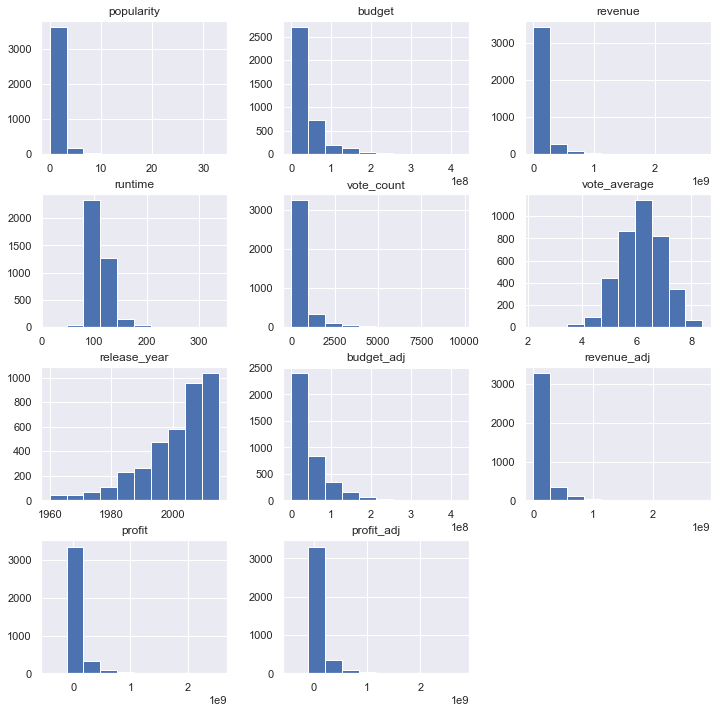

In [16]:
df.hist(figsize = (12,12));

<a id='eda'></a>
## Exploratory Data Analysis
In this chapter, we are going to answer the questions raised in the beginning of the research, and visualize the results.

### Research Question 1 (Movie Trends)
We are going to start with understanding how the movie industry has changed over the past 60 years. <br>Let's find out how many movies have been made every year. After that, we are going to calculate the percentage of movies that exceeded average revenue. We will also take a closer look at the changes in average revenue, budget and profit.

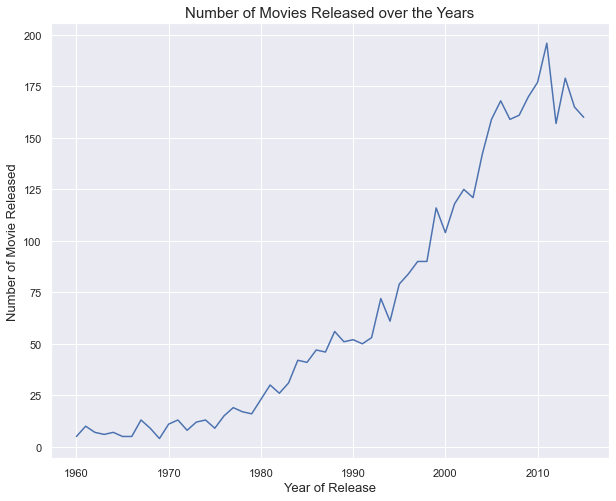

In [17]:
# Getting the number of Movies Released over the Years

df_total = df.groupby('release_year').count()['original_title']

plt.plot(df_total.index, df_total)
plt.title('Number of Movies Released over the Years', fontsize=15)
plt.xlabel('Year of Release', fontsize = 13)
plt.ylabel('Number of Movie Released', fontsize = 13);

    Given that the number of movie released is increasing, we can say the movie industry is still getting bigger after 50 years!

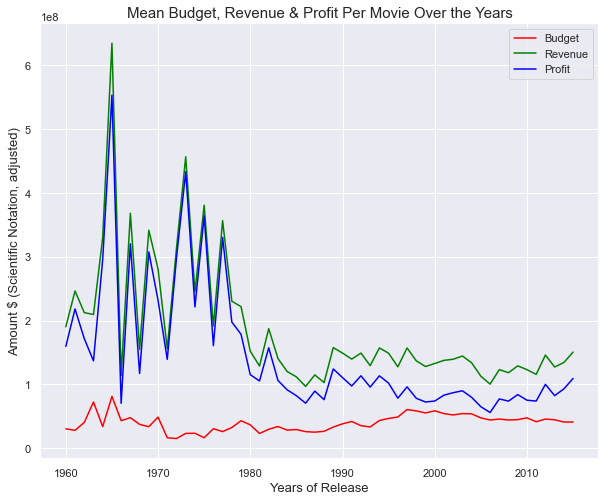

In [18]:
# Mean Budget, Revenue & Profit Per Movie

df_budget = df.groupby('release_year')['budget_adj'].mean()
df_revenue =  df.groupby('release_year')['revenue_adj'].mean()
df_profit = df.groupby('release_year')['profit_adj'].mean()

plt.plot(df_budget.index, df_budget, color='red', label="Budget")
plt.plot(df_revenue.index, df_revenue, color = 'green', label = "Revenue")
plt.plot(df_profit.index, df_profit, color = 'blue', label = "Profit")
plt.title("Mean Budget, Revenue & Profit Per Movie Over the Years", fontsize= 15)
plt.xlabel("Years of Release", fontsize= 13)
plt.ylabel("Amount $ (Scientific Notation, adjusted)", fontsize=13)
plt.legend();

    However, budget, revenue and profit for each movie has been decreasing, unlike the burst of the industry.
    I found how the budget changes intersting, becuase it was extraordinarily high in 60s, and it didn't grow much during the past 50 years. It's easy to expect that the budget would be much higher after 2000s, due to special effects etc. I decided to dig the data deeper.

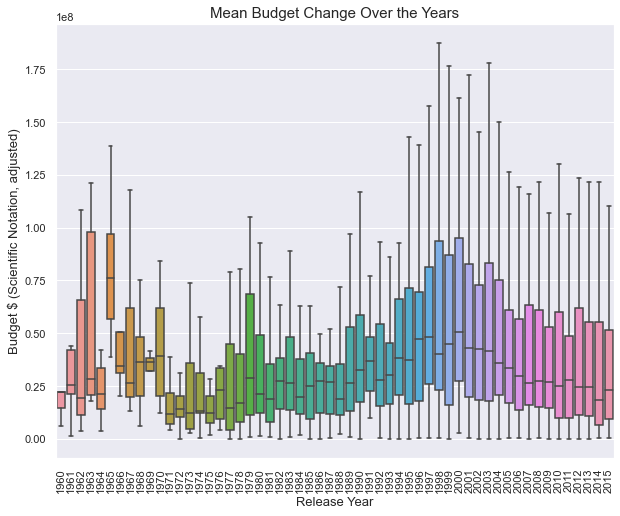

In [19]:
# Drawing a boxplot

sns.boxplot(x= df['release_year'], y=df["budget_adj"], sym='')
plt.title("Mean Budget Change Over the Years", fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Release Year', size=13)
plt.ylabel('Budget $ (Scientific Notation, adjusted)', size=13);

In [20]:
# Number of samples in 1960s

print("Below is the number of movies released in 1960s.")
df.groupby('release_year').original_title.count().head(10)

Below is the number of movies released in 1960s.


release_year
1960     5
1961    10
1962     7
1963     6
1964     7
1965     5
1966     5
1967    13
1968     9
1969     4
Name: original_title, dtype: int64

    From the boxplot, we can learn 2 things below:

    1) Budget in 60s were high indeed. 
     The medians in 60s were already at the similar level as the ones in 80s, except for the budget in 1965. Moreover, the huge gap between median and 75% percentile shows us that a few movies with higher budget would have lifted the mean value even higher. 
     However, since the number of smaple is too small (less than 15 each year), the number might not fully reflect the reality.

    2) Budget has been constantly decreasing since 2000. 
     Median, 25% percentile and 75% percentile have been decreasing. This could have dragged down the mean budget.

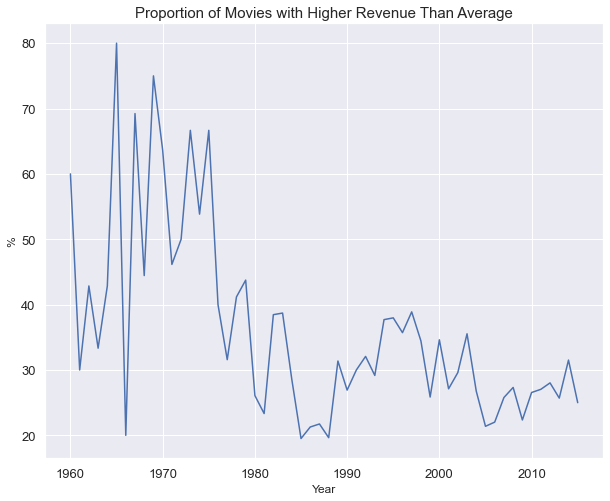

In [21]:
# Percentage of Movies with Higher Revenue Than Average

round(df.revenue_adj.mean()) # mean revenue(adj) is $ 138,715,934

df_revenue_above = df.query('revenue_adj > 138715934').groupby('release_year').count().original_title
df_revenue_above
df_revenue_all = df.groupby('release_year').count().original_title
df_revenue_all
df_prop= df_revenue_above *100 / df_revenue_all
df_prop

plt.title("Proportion of Movies with Higher Revenue Than Average", size=15)
plt.plot(df_prop.index, df_prop)
plt.xlabel('Year', size=12)
plt.ylabel('%', size=12)
plt.xticks(size=13)
plt.yticks(size=13);

### Research Question 2  (Popularity Analysis)
 Now that we understand changes in overall movie industry, let's start focusing on specific factors - for example, popularity. Popularity is important, because it is one of the criteria to decide whether a movie is accepted to general audiences.<br>
    What are the most frenquently made genres over the years? Are those genres necessirily the most popular ones? Who are the most popular casts and directors?

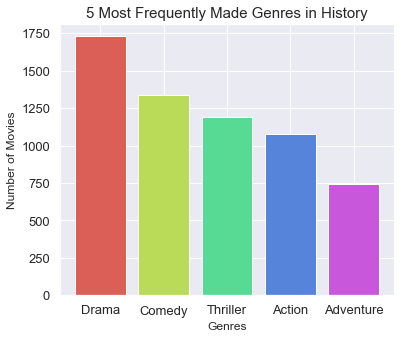

In [23]:
# 5 Most Frequently Made Genres in History

df_genres = df.assign(genres= df['genres'].str.split('|')).explode('genres')
df_genres.groupby(['genres'])['popularity'].mean().sort_values(ascending=False)
df_genres_num = df_genres['genres'].value_counts().head(5)

plt.subplots(figsize=(6, 5))
colors= sns.color_palette('hls',len(df_genres_num.index))
plt.bar(df_genres_num.index, df_genres_num, color=colors)
plt.title("5 Most Frequently Made Genres in History", size=15)
plt.xlabel('Genres', size=12)
plt.ylabel('Number of Movies', size=12)
plt.xticks(size=13)
plt.yticks(size=13);

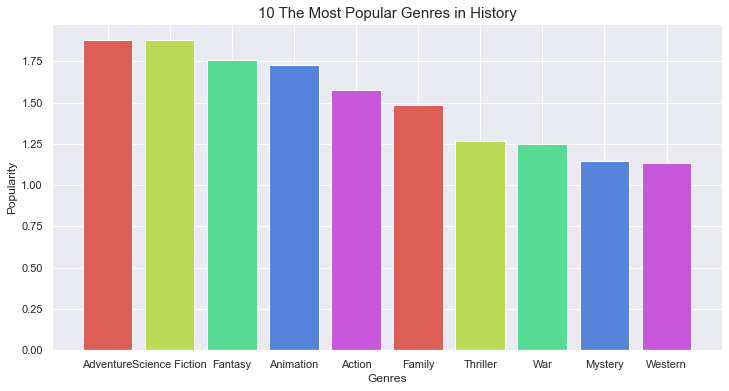

In [24]:
# 10 The Most Popular Genres Over the Year

df_genres_pop = df_genres.groupby(['genres'])['popularity'].mean().sort_values(ascending = False).head(10)

plt.subplots(figsize=(12, 6))
plt.bar(df_genres_pop.index, df_genres_pop, color=colors)
colors= sns.color_palette('hls',len(df_genres_pop.index))
plt.title("10 The Most Popular Genres in History", size=15)
plt.xlabel('Genres', size=12)
plt.ylabel('Popularity', size=12)
plt.xticks(size=11)
plt.yticks(size=11);

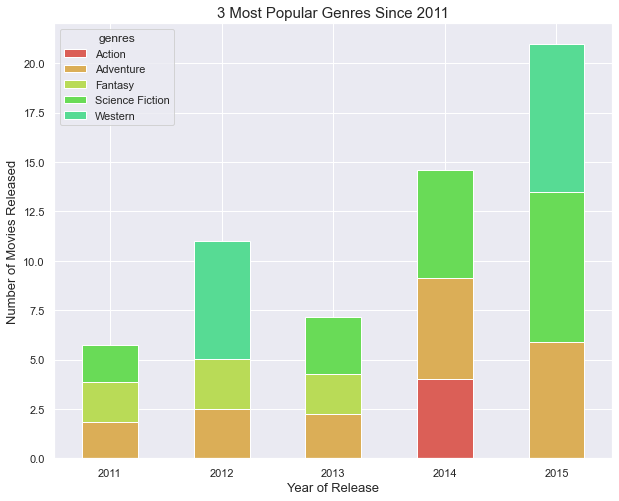

In [25]:
# 3 Most Popular Genres Since 2011

df_genres_year =  df_genres.query('release_year > 2010')

def year_genres(number):
    result = number.groupby('genres').popularity.mean().sort_values(ascending=False)[:3]
    return result

df_genres_year_pop = df_genres_year.groupby('release_year').apply(year_genres)

df_genres_year_pop.reindex(df_genres_year_pop.index, level=0)
df_genres_year_pop.unstack().plot.bar(stacked=True, color= colors)
colors= sns.color_palette('hls',len(df_genres_year_pop.index))

plt.title('3 Most Popular Genres Since 2011', fontsize=15)
plt.xlabel('Year of Release', fontsize = 13)
plt.ylabel('Number of Movies Released', fontsize = 13)
plt.xticks(rotation=0);

    We can see that the most frequently made genres (Drama) isn't always the most popular genres in general.(Adventure). Adventure has been always in 3 the most popular movies since 2011!

Caution: In order to get the average popularity per cast, we would normally calculate using Mean.
 However, because of casts who appeared in few popular movies and didn't apprear since then, the results could be different from the result we are expecting.
 Therefore it makes more sense to get the sum popularity, instead of mean popularity.


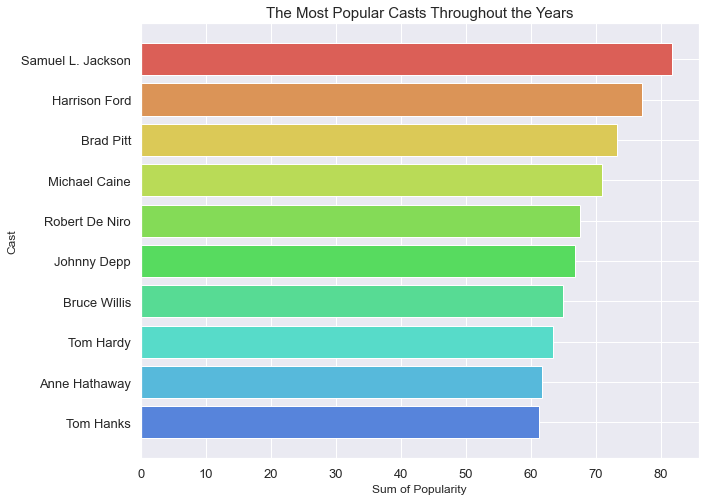

In [26]:
# 10 most popular casts

df_actor = df.assign(cast= df['cast'].str.split('|')).explode('cast')
print("Caution: In order to get the average popularity per cast, we would normally calculate using Mean.\n However, because of casts who appeared in few popular movies and didn't apprear since then, the results could be different from the result we are expecting.\n Therefore it makes more sense to get the sum popularity, instead of mean popularity.")
cast_pop = df_actor.groupby(['cast'])['popularity'].sum().sort_values(ascending=False).head(10)

plt.barh(cast_pop.index, cast_pop, color=colors)
plt.title("The Most Popular Casts Throughout the Years", size=15)
colors= sns.color_palette('hls',len(cast_pop.index))
plt.gca().invert_yaxis()
plt.xlabel('Sum of Popularity', size=12)
plt.ylabel('Cast', size=12)
plt.xticks(size=13)
plt.yticks(size=13);

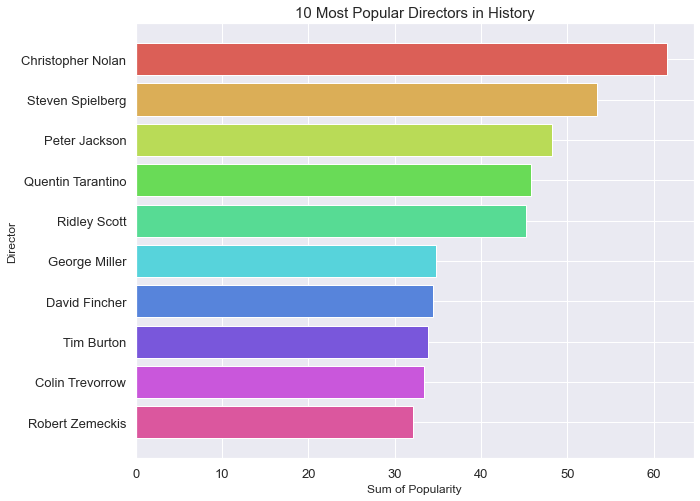

In [27]:
# 10 Most popular directors

director_pop = df.groupby(['director'])['popularity'].sum().sort_values(ascending=False).head(10)

colors= sns.color_palette('hls',len(director_pop.index))
plt.barh(director_pop.index, director_pop, color= colors)
plt.title("10 Most Popular Directors in History", size=15)
plt.gca().invert_yaxis()
plt.xlabel('Sum of Popularity', size=12)
plt.ylabel('Director', size=12)
plt.xticks(size=13)
plt.yticks(size=13);

### Research Question 3  (Revenue Analysis)
Revenue is another important factor when we take a look at the movie industry, because it's one of the main standands to decide whether a movie is successful or not. <br>
    When is the month of release at the highest revenue? What are the top 10 movies with the highest revenue? What are the values that are more correlated with revenue than other value does?

Considering movies generally earn most of the revenue during the first few weeks, we can assume the results would be related to revenue change throuthout the year. However, as long as we don't have more information why each month has different revenue, we can only guess the correlation.


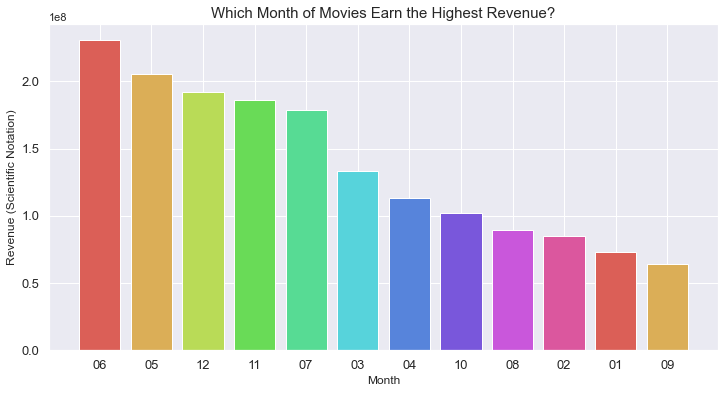

In [28]:
# Which month of movie the Highest Revenue

df['release_date'] = df['release_date'].astype(str)
df['release_month'] = df['release_date'].apply(lambda x: x.split("-")[1])
df_revenue_month = df.groupby(['release_month'])['revenue_adj'].mean().sort_values(ascending=False)

plt.subplots(figsize=(12, 6))
plt.title("Which Month of Movies Earn the Highest Revenue?", size=15)
plt.bar(df_revenue_month.index, df_revenue_month, color = colors)
colors= sns.color_palette('hls',len(df_revenue_month.index))
plt.xlabel('Month', size=12)
plt.ylabel('Revenue (Scientific Notation)', size=12)
plt.xticks(size=13)
plt.yticks(size=13);
print("Considering movies generally earn most of the revenue during the first few weeks, we can assume the results would be related to revenue change throuthout the year. However, as long as we don't have more information why each month has different revenue, we can only guess the correlation.")

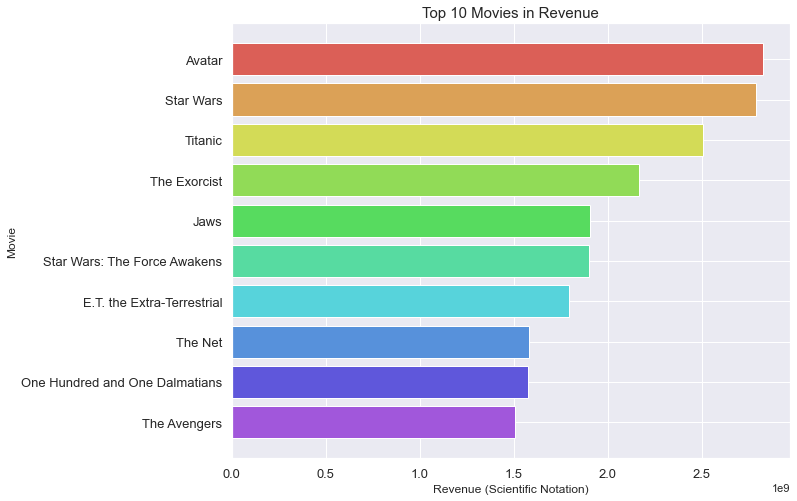

In [29]:
# 10 movies with the highest revenue

df_revenue_movie = df.groupby(['original_title'])['revenue_adj'].sum().sort_values(ascending= False).head(10)

plt.barh(df_revenue_movie.index, df_revenue_movie, color= colors)
colors= sns.color_palette('hls',len(df_revenue_movie.index))
plt.gca().invert_yaxis()
plt.title("Top 10 Movies in Revenue", size=15)
plt.xlabel('Revenue (Scientific Notation)', size=12)
plt.ylabel('Movie', size=12)
plt.xticks(size=13)
plt.yticks(size=13);

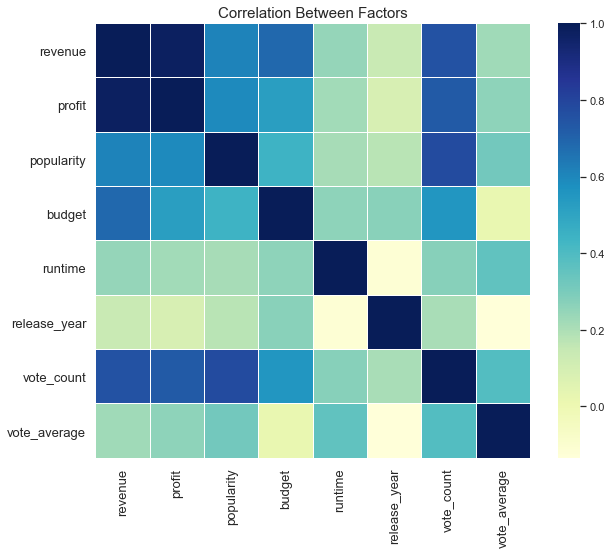

In [30]:
# Correlation between factors

heatmap_data = df[['revenue','profit','popularity','budget','runtime','release_year', 'vote_count', 'vote_average']]
ax = sns.heatmap(heatmap_data.astype(float).corr(), cmap='YlGnBu',linewidths = 0.1, vmax = 1.0, square=True)

plt.title('Correlation Between Factors', fontsize=15)
plt.xticks(size=13)
plt.yticks(size=13);

<a id='conclusions'></a>
## Conclusions

> ### What we have found out <br><br>
1) The movie industry has been increasing in size over the past 50 years. However, the average profit that a movie earns has been significantly decreasing since 1980s. Thus we can say the movie business is not as moneymaking business as it used to be. <br><br>
2) Drama is the genres that the most , while Adventure is the most popular genres. In the same context, Adventure has been always one of 3 most popular genres since 2011. There is a gap between the most popular genres and the most frequently made genres.<br><br>
3) Movies release in June earn the higest revenue, while the ones in September earn the lowest. The percentage of movies earning more than average is getting smaller as time goes by. It's vote_count, budget and popularity that has the stronger correlation with revenue than other factors.<br><br>
 

> ### Limits of the research <br><br>
 1) We had to remove nearly 60% of the original data, because of missing values in budget and revenue. It ensured an accuracy when it comes to money-related questions, but we had to sacrifice accurate results in other questions.
<br><br>
 2) There were too small number of samples for the data in 1960s, even before data cleaning process. Thus the chance is high that the result could be skewed by small number of data.<br><br>
 3) There is no information on how popularity was measured. We could have investigated further if we had more details on popularity.<br><br>
 4) No statistical analysis has been conducted on this research.
 

> ### Reference  <br><br>
 1) Instructions given by mentors from Udacity. Special thanks to Myles. <br><br>
 2) https://www.shanelynn.ie/ for Bar chart